In [ ]:
import os
import zipfile
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path to chess piece images
dataset_path = '/content/drive/MyDrive/practice/gari'
img_size = (224, 224)
batch_size = 32
seed = 42

In [ ]:
# Data generators with augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Using 20% for validation
)


In [ ]:
# Load training data
train_data = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  # Changed to categorical for multi-class
    subset='training',
    seed=seed
)


Found 14217 images belonging to 2 classes.


In [ ]:
# Load validation data
val_data = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    seed=seed
)

Found 3553 images belonging to 2 classes.


In [ ]:
# Load VGG16 model
vgg_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(img_size[0], img_size[1], 3)
)
vgg_base.trainable = False  # Freeze convolutional layers

# Build custom classifier
num_classes = len(train_data.class_indices)  # Automatically detect number of classes


In [ ]:

from tensorflow.keras.optimizers import Adam
model = models.Sequential([
    vgg_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Added dropout for regularization
    layers.Dense(num_classes, activation='softmax')  # Changed to softmax for multi-class
])

# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',  # Changed loss function
    metrics=['accuracy']
)

# Train model
history = model.fit(
    train_data,
    epochs=5,  # Increased epochs
    validation_data=val_data,
    steps_per_epoch=train_data.samples // batch_size,
    validation_steps=val_data.samples // batch_size
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 11877s 27s/step - accuracy: 0.8770 - loss: 0.2847 - val_accuracy: 0.9825 - val_loss: 0.0681
Epoch 2/5
  1/444 ━━━━━━━━━━━━━━━━━━━━ 2:25:23 20s/step - accuracy: 1.0000 - loss: 0.0475

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


444/444 ━━━━━━━━━━━━━━━━━━━━ 2357s 5s/step - accuracy: 1.0000 - loss: 0.0475 - val_accuracy: 0.9828 - val_loss: 0.0565
Epoch 3/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 11497s 26s/step - accuracy: 0.9530 - loss: 0.1197 - val_accuracy: 0.9640 - val_loss: 0.0935
Epoch 4/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 2318s 5s/step - accuracy: 1.0000 - loss: 0.0216 - val_accuracy: 0.9727 - val_loss: 0.0791
Epoch 5/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 11655s 26s/step - accuracy: 0.9683 - loss: 0.0901 - val_accuracy: 0.9910 - val_loss: 0.0268


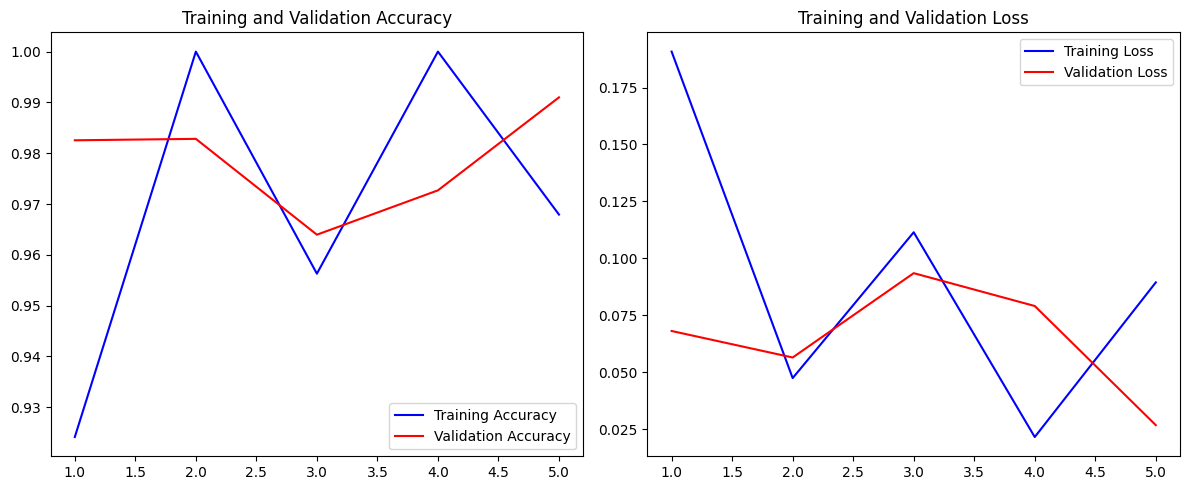

In [ ]:

# Visualization
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)


**Apply Resnet**